# Criteria demonstration

In [41]:
# Import the Wastimate module
from Wastimate import *

In [42]:
# Create a radioactive waste package with a mass of 1, containing 1 GBq of Sr-90.
# Sr-90 is in secular equilibrium with its daughter products.
WastePackage   = Package(Mass=1, Inventory={"Sr90":1e9}, mode="activity", secular_equilibrium=["Sr90"])

# Create 1 empty node and 1 node containing 100 packages.
StorageNode    = Node(packagelist=[WastePackage], multiplication_factor=100)
DisposalNode   = Node()

# If the activity has fallen below 500 MBq, transfer the package from StorageNode to DisposalNode. 
# Region specifies what criteria is checked, "package" corresponds to individual packages, while
# "node" checks the total sum of all the packages in a node.
# Principle determines whether the transfer will be initiated when the checked value fall below the criteria (min)
# or is exceeded (max). 
# Multiple criteria can be added to the list, in this case all of them need to be fulfilled for the transfer to occur.
# Suitable variables are "activity", "mass", and "heat" as in decay heat.
Transfer_Criteria = {"region":"package", "variable":"activity", "principle":"min", 
                     "nuclide":["Sr90"], "criteria":[500e6]}

# Create a transfer "order" to move 1 package per timestep from StorageNode to DisposalNode.
TransferOrder = Order(homenode=DisposalNode, ordernodes=[StorageNode], magnitude=1, criteria=[Transfer_Criteria])

# Create a universe that contains the two nodes and the transfer order.
ModelUniverse = Universe(stepsize=1*60*60*24*365) + StorageNode + DisposalNode + TransferOrder

# Simulate 120 timesteps (120 years).
ModelUniverse.simulate(timesteps=120)

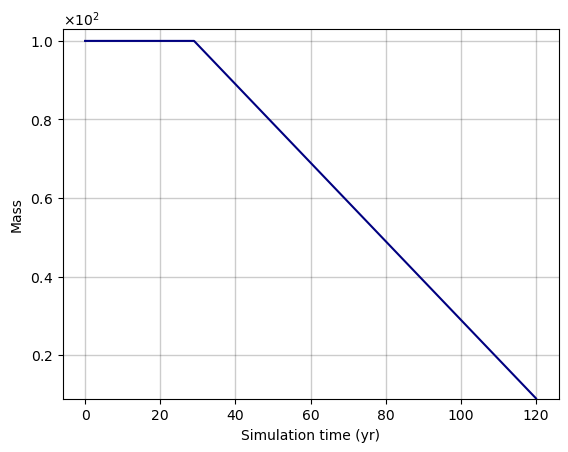

In [43]:
# Plot the mass of StorageNode. At first, the criteria limits the transfer of packages, no change occurs.
# Once the package activities have decayed enough, the packages are transferred to DisposalNode.
plot1 = ModelUniverse.plot(StorageNode, variable="mass", time_units="yr")

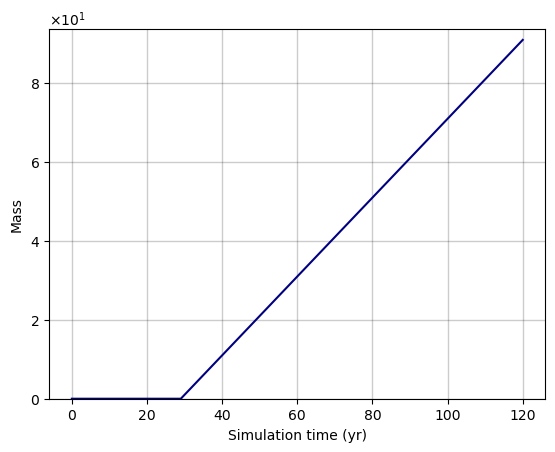

In [45]:
# Mass plot of DisposalNode
plot2 = ModelUniverse.plot(DisposalNode, variable="mass", time_units="yr")

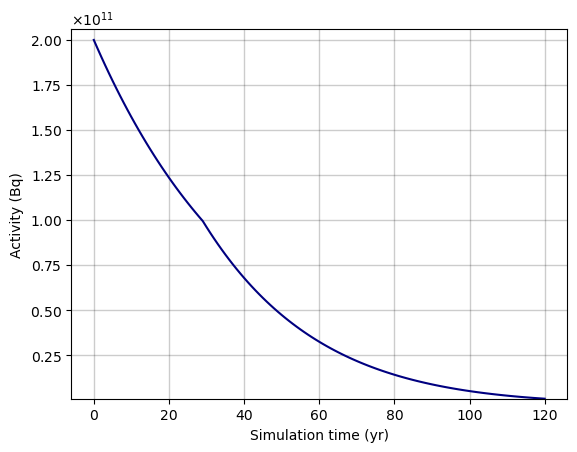

In [46]:
# Plot the activity of StorageNode. Due to radioactive decay, the value decreases.
# Due to the addition of new packages, the value increases.
# As a net effect, the new packages cannot overcome the activity decrease.
plot3 = ModelUniverse.plot(StorageNode, variable="activity", time_units="yr")